## **Case Study 1 – Figuring Out Which Employees May Quit – Retention Analysis**

Load and take a look at Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
hr_df=pd.read_csv('hr_data.csv')

In [ ]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
print(hr_df['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [ ]:
print(hr_df['salary'].unique())

['low' 'medium' 'high']


In [ ]:
hr_df.shape

(14999, 9)

In [ ]:
emp_stais_evl=pd.read_excel("employee_satisfaction_evaluation.xlsx")

In [ ]:
emp_stais_evl.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
emp_stais_evl.rename(columns={"EMPLOYEE #": "employee_id"},inplace=True, errors='raise')
emp_stais_evl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [ ]:
emp_stais_evl.shape

(14999, 3)

In [ ]:
main_df = pd.merge(hr_df, emp_stais_evl, on="employee_id")

In [ ]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [ ]:
main_df.fillna(main_df.mean(), inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
main_df.groupby("department").sum().drop(columns="employee_id")

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [ ]:
main_df.groupby("department").mean().drop(columns="employee_id")

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [ ]:
main_df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
main_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Displaying Correlation

No handles with labels found to put in legend.


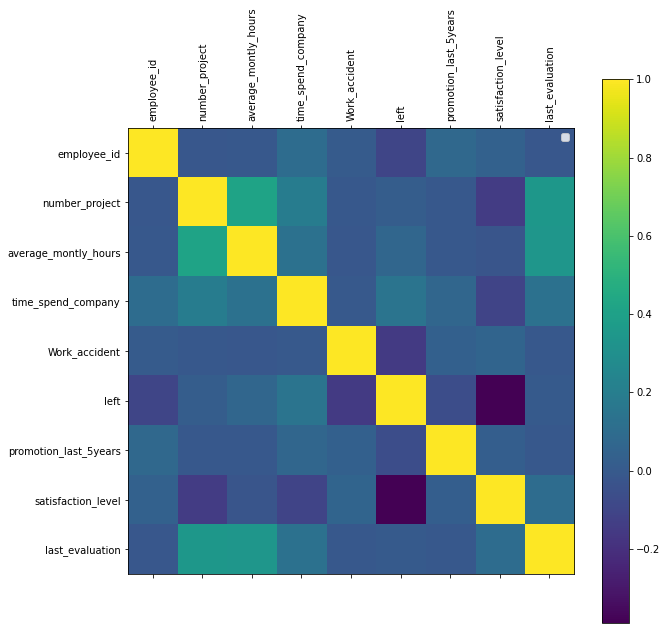

In [ ]:
def plt_corr(df,size=10):

  corr=df.corr()
  fig,ax = plt.subplots(figsize=(size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)


plt_corr(main_df)

Prepare Data for ML

In [ ]:
main_df=pd.get_dummies(main_df, columns=["department","salary"], drop_first= True)

In [ ]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,1003,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,1005,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,1486,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,1038,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,1057,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x=main_df.drop(['left',"employee_id"], axis=1).values
y=main_df.left.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
df_train = pd.DataFrame(x_train)
df_test = pd.DataFrame(x_test)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.462363,-0.956110,-0.339101,-0.41397,-0.145616,-0.973332,-1.209159,-0.234217,-0.232629,-0.228736,-0.206151,-0.251376,3.898995,-0.613495,-0.418694,-0.471267,1.027524,-0.870315
1,1.790120,2.097853,0.344505,-0.41397,-0.145616,-2.022925,0.777723,-0.234217,4.298682,-0.228736,-0.206151,-0.251376,-0.256476,-0.613495,-0.418694,-0.471267,-0.973213,1.149009
2,-0.649242,0.128851,-0.339101,-0.41397,-0.145616,1.408436,-0.098843,-0.234217,-0.232629,-0.228736,-0.206151,-0.251376,-0.256476,-0.613495,-0.418694,-0.471267,-0.973213,-0.870315
3,-1.462363,-0.433721,1.028110,-0.41397,6.867354,0.399212,-2.027287,-0.234217,-0.232629,-0.228736,-0.206151,-0.251376,-0.256476,-0.613495,2.388376,-0.471267,1.027524,-0.870315
4,0.977000,0.631147,0.344505,-0.41397,-0.145616,0.318475,-1.384472,-0.234217,-0.232629,-0.228736,-0.206151,-0.251376,-0.256476,1.630004,-0.418694,-0.471267,-0.973213,1.149009


Let's Train MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(x_train , y_train)

prediction = model.predict(x_test)

print("accuracy: {0:.2f}%".format(100*accuracy_score(prediction, y_test)))
print("**************")
print(confusion_matrix(y_test, prediction))
print("**************")
print(classification_report(y_test, prediction))

accuracy: 78.27%
**************
[[3163  218]
 [ 760  359]]
**************
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3381
           1       0.62      0.32      0.42      1119

    accuracy                           0.78      4500
   macro avg       0.71      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



In [ ]:
model = RandomForestClassifier()
model.fit(x_train , y_train)

prediction = model.predict(x_test)

print("accuracy: {0:.2f}%".format(100*accuracy_score(prediction, y_test)))
print("**************")
print(confusion_matrix(y_test, prediction))
print("**************")
print(classification_report(y_test, prediction))

accuracy: 98.80%
**************
[[3371   10]
 [  44 1075]]
**************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3381
           1       0.99      0.96      0.98      1119

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
feature_importance=pd.DataFrame(model.feature_importances_,index = pd.DataFrame(x_train).columns,columns = ["importance"]).sort_values("importance", ascending = False)
feature_importance

,importance
5,0.336013
2,0.182939
0,0.165235
1,0.142596
6,0.129794
3,0.010138
16,0.006979
15,0.004045
17,0.003829
13,0.003649
